<a href="https://colab.research.google.com/github/carlosgilrodrigo/TFM/blob/main/Clustering80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#Importación de paquetes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
#Lectura de datos
df = pd.read_csv('/content/drive/MyDrive/TFM/datasetLimpio60.csv', decimal='.')
df

,home_team,away_team,result_full,result_ht,home_passes,home_possession,home_shots,home_shots_on_target,home_touches,away_passes,...,goals_scored_ft_avg_A,goals_conced_ft_avg_A,sg_match_ft_acum_A,goals_scored_ht_avg_A,goals_conced_ht_avg_A,sg_match_ht_acum_A,performance_acum_A,result_match,result_descanso,num_season
0,blackpool,west bromwich albion,2-1,1-0,0.45,0.73,0.59,0.29,0.49,0.14,...,0.21,0.46,0.42,0.00,0.25,0.40,0.33,0,0,1
1,liverpool,manchester city,3-0,3-0,0.42,0.54,0.48,0.29,0.50,0.37,...,0.24,0.18,0.61,0.27,0.07,0.74,0.49,0,0,1
2,manchester united,arsenal,1-0,1-0,0.30,0.43,0.39,0.35,0.36,0.41,...,0.31,0.17,0.62,0.29,0.06,0.66,0.71,0,0,1
3,stoke city,aston villa,2-1,0-1,0.12,0.39,0.48,0.53,0.19,0.26,...,0.00,1.00,0.42,0.00,0.75,0.43,0.00,0,2,1
4,fulham,chelsea,0-0,0-0,0.19,0.30,0.30,0.29,0.29,0.51,...,0.28,0.18,0.64,0.23,0.19,0.49,0.46,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,liverpool,brighton and hove albion,0-1,0-0,0.62,0.70,0.25,0.06,0.67,0.29,...,0.20,0.23,0.48,0.20,0.20,0.46,0.40,2,1,11
4066,burnley,leicester city,1-1,1-1,0.21,0.32,0.27,0.41,0.23,0.50,...,0.32,0.14,0.73,0.23,0.10,0.63,0.77,1,1,11
4067,crystal palace,manchester united,0-0,0-0,0.21,0.29,0.18,0.12,0.25,0.53,...,0.32,0.17,0.70,0.23,0.19,0.49,0.74,1,1,11
4068,sheffield united,aston villa,1-0,1-0,0.10,0.16,0.20,0.12,0.13,0.58,...,0.23,0.13,0.64,0.21,0.06,0.66,0.59,0,0,11


In [14]:
eliminacion_columnas_menor_80 = ['home_shots', 'away_shots',  'home_shots_on_target', 'away_shots_on_target', 'corners_avg_H', 'corners_avg_A']
df.drop(eliminacion_columnas_menor_80, axis=1, inplace=True)
df

,home_team,away_team,result_full,result_ht,home_passes,home_possession,home_touches,away_passes,away_possession,away_touches,...,goals_scored_ft_avg_A,goals_conced_ft_avg_A,sg_match_ft_acum_A,goals_scored_ht_avg_A,goals_conced_ht_avg_A,sg_match_ht_acum_A,performance_acum_A,result_match,result_descanso,num_season
0,blackpool,west bromwich albion,2-1,1-0,0.45,0.73,0.49,0.14,0.27,0.19,...,0.21,0.46,0.42,0.00,0.25,0.40,0.33,0,0,1
1,liverpool,manchester city,3-0,3-0,0.42,0.54,0.50,0.37,0.46,0.46,...,0.24,0.18,0.61,0.27,0.07,0.74,0.49,0,0,1
2,manchester united,arsenal,1-0,1-0,0.30,0.43,0.36,0.41,0.57,0.52,...,0.31,0.17,0.62,0.29,0.06,0.66,0.71,0,0,1
3,stoke city,aston villa,2-1,0-1,0.12,0.39,0.19,0.26,0.61,0.35,...,0.00,1.00,0.42,0.00,0.75,0.43,0.00,0,2,1
4,fulham,chelsea,0-0,0-0,0.19,0.30,0.29,0.51,0.70,0.65,...,0.28,0.18,0.64,0.23,0.19,0.49,0.46,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,liverpool,brighton and hove albion,0-1,0-0,0.62,0.70,0.67,0.29,0.30,0.34,...,0.20,0.23,0.48,0.20,0.20,0.46,0.40,2,1,11
4066,burnley,leicester city,1-1,1-1,0.21,0.32,0.23,0.50,0.68,0.53,...,0.32,0.14,0.73,0.23,0.10,0.63,0.77,1,1,11
4067,crystal palace,manchester united,0-0,0-0,0.21,0.29,0.25,0.53,0.71,0.58,...,0.32,0.17,0.70,0.23,0.19,0.49,0.74,1,1,11
4068,sheffield united,aston villa,1-0,1-0,0.10,0.16,0.13,0.58,0.84,0.65,...,0.23,0.13,0.64,0.21,0.06,0.66,0.59,0,0,11


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-17-a7ed7beb99e6>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_victorias_locales['cluster_result_local'] = kmeans_local.fit_predict(features_scaled_local)
<ipython-input-17-a7ed7beb99e6>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_victorias_locales

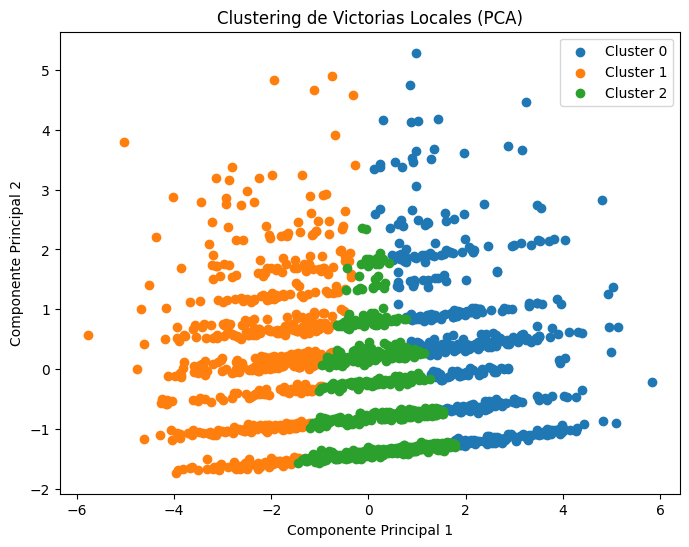

In [17]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Selecciona las características relevantes para el rendimiento del equipo local
features_local = [
    'home_passes', 'away_passes',
    'home_possession', 'away_possession',
    'goal_home_ft', 'goal_away_ft'
]

# Filtra el DataFrame para considerar solo las victorias locales
df_victorias_locales = df[df['result_match'] == 0]

# Selecciona las características y etiquetas para el clustering
features_for_clustering_local = df_victorias_locales[features_local]

# Normalización/estandarización de características
scaler_local = StandardScaler()
features_scaled_local = scaler_local.fit_transform(features_for_clustering_local)

# Aplica PCA para reducir a 2 componentes principales
pca_local = PCA(n_components=2)
features_pca_local = pca_local.fit_transform(features_scaled_local)

# K-Means clustering para el rendimiento del equipo local
kmeans_local = KMeans(n_clusters=3, random_state=42)
df_victorias_locales['cluster_result_local'] = kmeans_local.fit_predict(features_scaled_local)

# Añade las componentes principales al DataFrame
df_victorias_locales['PCA_Component_1'] = features_pca_local[:, 0]
df_victorias_locales['PCA_Component_2'] = features_pca_local[:, 1]

# Grafica de dispersión con colores según el cluster
plt.figure(figsize=(8, 6))

for cluster in range(3):
    cluster_data = df_victorias_locales[df_victorias_locales['cluster_result_local'] == cluster]
    plt.scatter(cluster_data['PCA_Component_1'], cluster_data['PCA_Component_2'], label=f'Cluster {cluster}')

plt.title('Clustering de Victorias Locales (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()